<a href="https://colab.research.google.com/github/marciusdm/dsnp/blob/main/projeto5/ChurnPredictionForTelcomCompany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [Marcius D. Moraes](https://github.com/marciusdm)*  

---

# Churn Prediction
*Churn rate*, or just *churn*, represents the evasion rate of you customer base. On services like Spotify or Netflix, it represents the cancelation rate of subscriptions
<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

It is extremely important for management and its analysis over time can show that there is a problem that must be tackled.
*Churn* can also be used to identify potential cancellations, with some time in advance, and promote targeted actions to try to retain such customers. This metric should receive attention due to the fact that the Customer Acquisition Cost (CAC) is usually higher than the cost to keep them. That is, a high value for the *churn rate* is what we do not want.


##1. Project context
As we've seen in the introduction, the cost for mantaining a customer is smaller than the cost of losing a customer. In fact, acquiring a new customer can cost up to [25 times more](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers) than retaining an existing one. It isn't hard to understand why this happens as there is no need to pursuit and find a new client. Keeping the ones you have happy is enough.
There is even some measures for evaluate the amount of customer who have quit and the amount of revenue lost due to these cancellations.

The two major measures are:
*   *Churn rate*: total of customers who cancelled service on the current month / number of clients at the beginning of the mont x 100;
* Churn revenue or MRR Churn: it measures the revenue lost with cancellations or downgrades. MRR is an acronym for *Monthly Recurring Revenue*. Churn revenue is the sum of MRR's of lost customers.  
Churn revenue can also be expressed in a relative way by dividing it by the  total month revenue.

Here are the formulas for the measures above:

$$
\text{Churn rate} = \frac{\text{# of cancellations}}{\text{# of active customers}} * 100 \\[2em]
\text{MRR Churn} = \Sigma (\text{MRR of lost clients)}\\[2em]
\text{MRR Churn %} = \frac{\text{MRR Churn}}{\text{MRR on last month}}*100
$$

Interestingly, revenue churn can be negative. That is, even if you lose customers, the company increases revenue. For this to happen, it is enough to increase sales to existing customers and that this additional gain exceeds the losses with cancellations. However, this is a very particular case, and in general, customer loss leads to revenue loss. For this very reason, it is important for companies to invest in actions to try to retain their customers.

To achieve this goal, companies can use different strategies, which are part of what is called [Customer Success](https://blog.hubspot.com/service/customer-success). Some measures that can be taken to retain customers are:
* Invest in loyalty programs;
* Create channels to get customer feedback;
* Improve customer service;
* Improve after-sales processes;
* Identify customers who are most likely to cancel.

Our focus, from now on, is on the last task above, that is, trying to predict which customers will cancel their contracts. For this, in this project a machine learning solution (*machine learning) will be proposed, in which several models will be tested in order to find out which one does better.



## 2. Obtaining data
The data which will be userd for training Machine Learning models come from [Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset), which, for its turn, have acquired these data from IBM Developer platform. However, IBM doesn't mantain these data anymore.

This is a set of customer data from a fictitious telecommunications company, which holds 7043 records, from which some of them refers to customer who has left the company.

In [1]:
# import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier




In [2]:
# importing data
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)
print("Shape of the dataset: ", df.shape)


Shape of the dataset:  (7043, 21)


## 3. Exploratory analysis
We will check data structure of our dataset.



### 3.1 Showing the first entries of the dataset
Firstly, let's preview the first five lines:



In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3.2 Discovering variable types
The command below is used for showing data types of each column of this dataset:


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Weirdly, `TotalCharges` column is not numerical. By examinating the CSV it was discovered that some records have blank values for this column. This happens with new customers, who didn't make any payment yet. Thus, we will have to do a transformation in order to convert blank values to zeroes:


In [3]:
df['TotalCharges']= df['TotalCharges'].apply(lambda x: 0.0 if  x == ' ' else float(x))
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

By now, field `TotalCharges` became numerical.
There is many categorical variables in this dataset, and hence, we must pre-proccess data before feeding our machine learning models.

### 3.3 Data dictionary
`CustomerID`: Customer ID;  
`gender`: whether customer is male or female;  
`SeniorCitizen`: whether customer is 65 or older: (1, 0);  
`Partner`: whether customer has a partner (Yes, No);  
`Dependents`: whether customer has dependents (Yes, No). Dependents could be children, parents, grandparents, etc;  
`tenure`: Total amount of months that the customer has been with the company;  
`PhoneService`: whether the customer subscribes to home phone service with the company: Yes, No   
`MultipleLines`: whether the customer subscribes to multiple telephone lines with the company: Yes, No   
`InternetService`: whether the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.   
`OnlineSecurity`: whether the customer subscribes to an additional online security service provided by the company: Yes, No   
`OnlineBackup`: whether the customer subscribes to an additional online backup service provided by the company: Yes, No   
`DeviceProtection`: whether the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No   
`TechSupport`: whether the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No   
`StreamingTV`: whether the customer uses their Internet service to stream television programing from a third party provider: Yes, No.   
`StreamingMovies`: whether the customer uses their Internet service to stream movies from a third party provider: Yes, No.   
`Contract`: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.   
`Paperless Billing`: Indicates if the customer has chosen paperless billing: Yes, No   
`Payment Method`: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check   
`Monthly Charge`: Indicates the customer’s current total monthly charge for all their services from the company.   
`Total Charges`: Indicates the customer’s total charges   
`Churn`: Yes = the customer left the company this month. No = the customer remained with the company.   


### 3.4 Statistical summary of data

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


It can be noticed by data above that about 16% of the customers has 65 years or older, moreover, the period in average that the customers remains on this company is 32 months and the average monthly payment is $64.75. Now, let's draw a boxplot for the numerical columns:


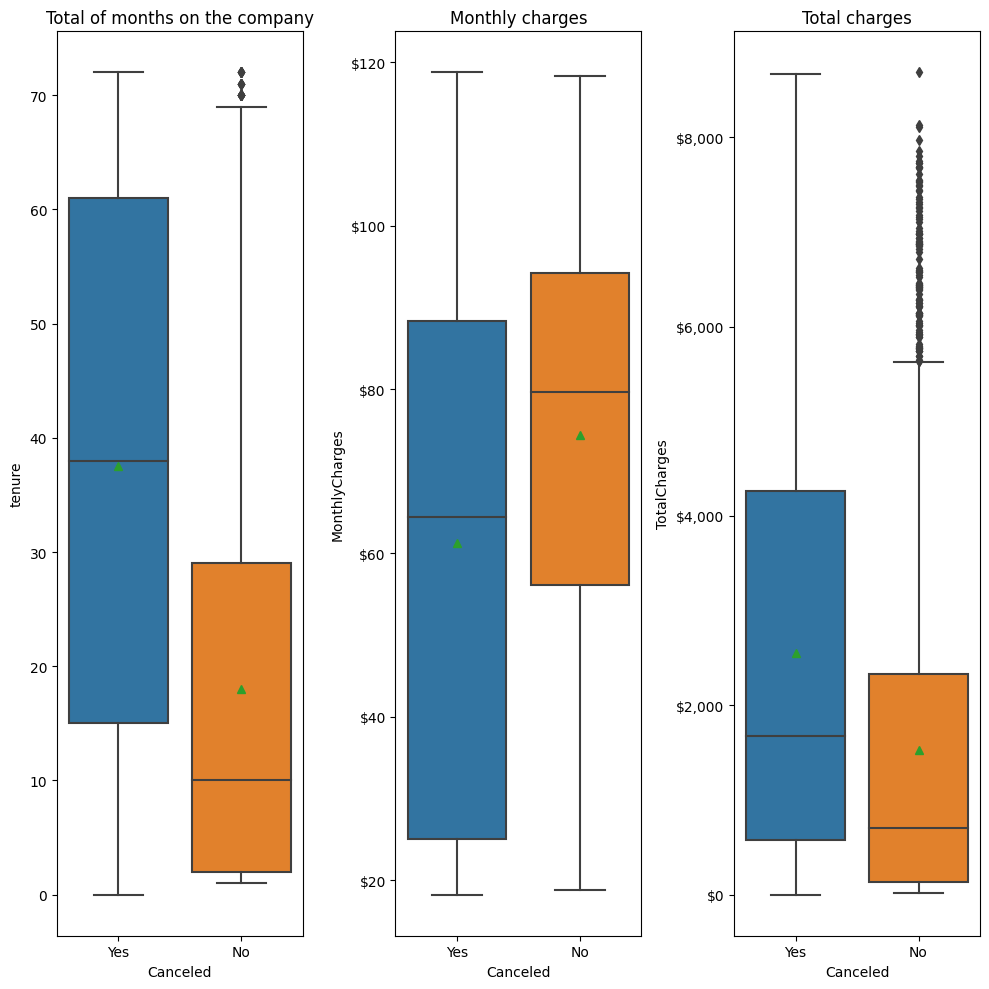

In [ ]:
fig, (ax1,ax2,ax3 ) = plt.subplots( nrows=1, ncols=3 , sharex=True,figsize=(10,10)) #figsize=(12,10)


sns.boxplot(x=df.Churn, y=df.tenure, showmeans=True, ax=ax1)
ax1.set_title("Total of months on the company")
ax1.set_xlabel("Canceled")

sns.boxplot(x=df.Churn, y=df.MonthlyCharges, showmeans=True, ax=ax2)
#insert the dollar sign on values of the y axis
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

ax2.set_title("Monthly charges")
ax2.set_xlabel("Canceled")

sns.boxplot(x=df.Churn, y=df.TotalCharges, showmeans=True, ax=ax3)
#insert the dollar sign on values of the y axis
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

ax3.set_title("Total charges")
ax3.set_xlabel("Canceled")

plt.xticks([0,1], ['Yes', 'No'])

plt.tight_layout()

There is a difference between the profile of users who canceled services with the company and those who did not. The ones who canceled have, on average, higher monthly charges and less time with the company, and consequently their total charges (the rightmost chart) are cheaper.
### 3.5 Checking if there is null values

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null values
### 3.6.Checking data balance
Let's now check proportion of customers who canceled services with Telco and who remained.

No     5174
Yes    1869
Name: Churn, dtype: int64

Churn represents 26.5370% of the dataset.



[]

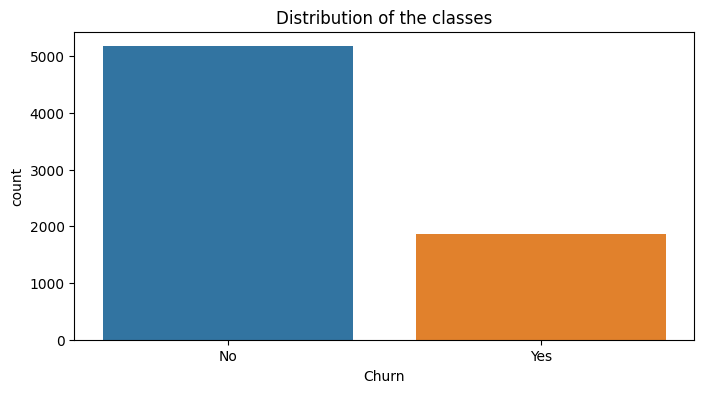

In [ ]:
# plotar gráfico de barras para as Classes
# plot bar chart for the classes
# checking balances
print(df.Churn.value_counts())
print("\nChurn represents {:.4f}% of the dataset.\n".format((df[df.Churn == 'Yes'].shape[0] / df.shape[0]) * 100))

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='Churn', data=df, ax=ax)
ax.set_title('Distribution of the classes')
plt.plot()

Churn represents 26.5% of total amount of records.  In real life, the annual churn rate is about [1.9% per month](https://www.heavy.ai/blog/strategies-for-reducing-churn-rate-in-the-telecom-industry). As these are fictitious data, the number of cancellations was probably inflated for didactic purposes.


### 3.7 An overview of Telco customers
Let's now show a profile of Telco customers, in terms of gender, age and contracted services.
First we'll show and general overview of customers, and next we will investigate which kind of customer is more likely to churn.

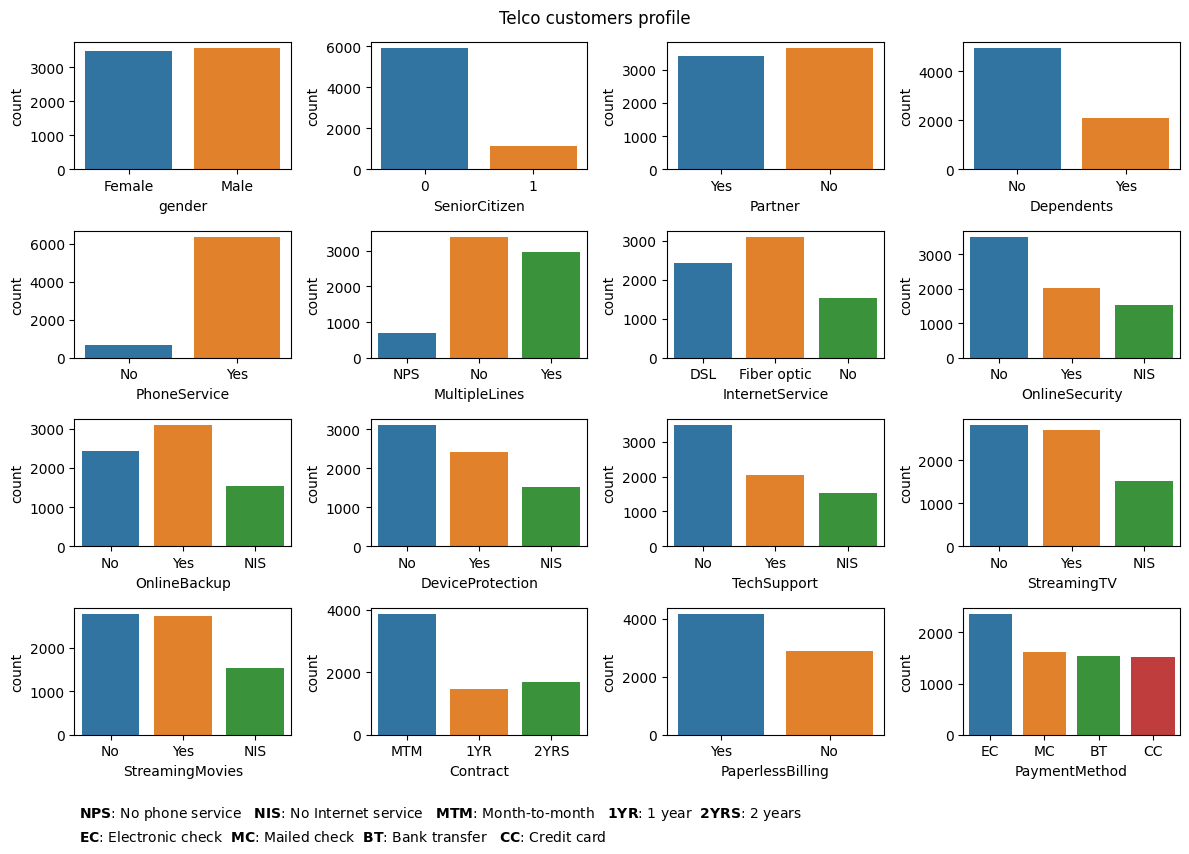

In [4]:
#general overview of customers
fig, ax = plt.subplots(figsize=(12,8), ncols=4, nrows=4)
fig.suptitle("Telco customers profile")
sns.countplot(x='gender', data=df, ax=ax[0,0])
sns.countplot(x='SeniorCitizen', data=df, ax=ax[0,1])
sns.countplot(x='Partner', data=df, ax=ax[0,2])
sns.countplot(x='Dependents', data=df, ax=ax[0,3])
sns.countplot(x='PhoneService', data=df, ax=ax[1,0])
sns.countplot(x='MultipleLines', data=df, ax=ax[1,1])
ax[1,1].set_xticks([0,1,2], ['NPS','No','Yes'])
sns.countplot(x='InternetService', data=df, ax=ax[1,2])
sns.countplot(x='OnlineSecurity', data=df, ax=ax[1,3])
ax[1,3].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='OnlineBackup', data=df, ax=ax[2,0])
ax[2,0].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='DeviceProtection', data=df, ax=ax[2,1])
ax[2,1].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='TechSupport', data=df, ax=ax[2,2])
ax[2,2].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='StreamingTV', data=df, ax=ax[2,3])
ax[2,3].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='StreamingMovies', data=df, ax=ax[3,0])
ax[3,0].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='Contract', data=df, ax=ax[3,1])
ax[3,1].set_xticks([0,1,2], ['MTM','1YR','2YRS'])
sns.countplot(x='PaperlessBilling', data=df, ax=ax[3,2])
sns.countplot(x='PaymentMethod', data=df, ax=ax[3,3])
ax[3,3].set_xticks([0,1,2,3], ['EC','MC','BT','CC'])
plt.figtext(0.07,-0.03,"$\\bf{NPS}$: No phone service   $\\bf{NIS}$: No Internet service   $\\bf{MTM}$: Month-to-month   $\\bf{1YR}$: 1 year  $\\bf{2YRS}$: 2 years")
plt.figtext(0.07, -0.06,"$\\bf{EC}$: Electronic check  $\\bf{MC}$: Mailed check  $\\bf{BT}$: Bank transfer   $\\bf{CC}$: Credit card")
plt.tight_layout()
plt.show()

It can be noticed above, that, in terms of gender, partner
As can be seen above, the distribution of clients is well balanced in terms of gender and the existence of dependents. Another aspect where there is a balance is regarding *streaming* services.  
On the other hand, only a minority of customers are elderly and have dependents. As for services, most have telephone and Internet services. The most common form of contract is month to month and the most used form of payment is electronic check.  
Let's now analyze the profile of who is more likely to churn.


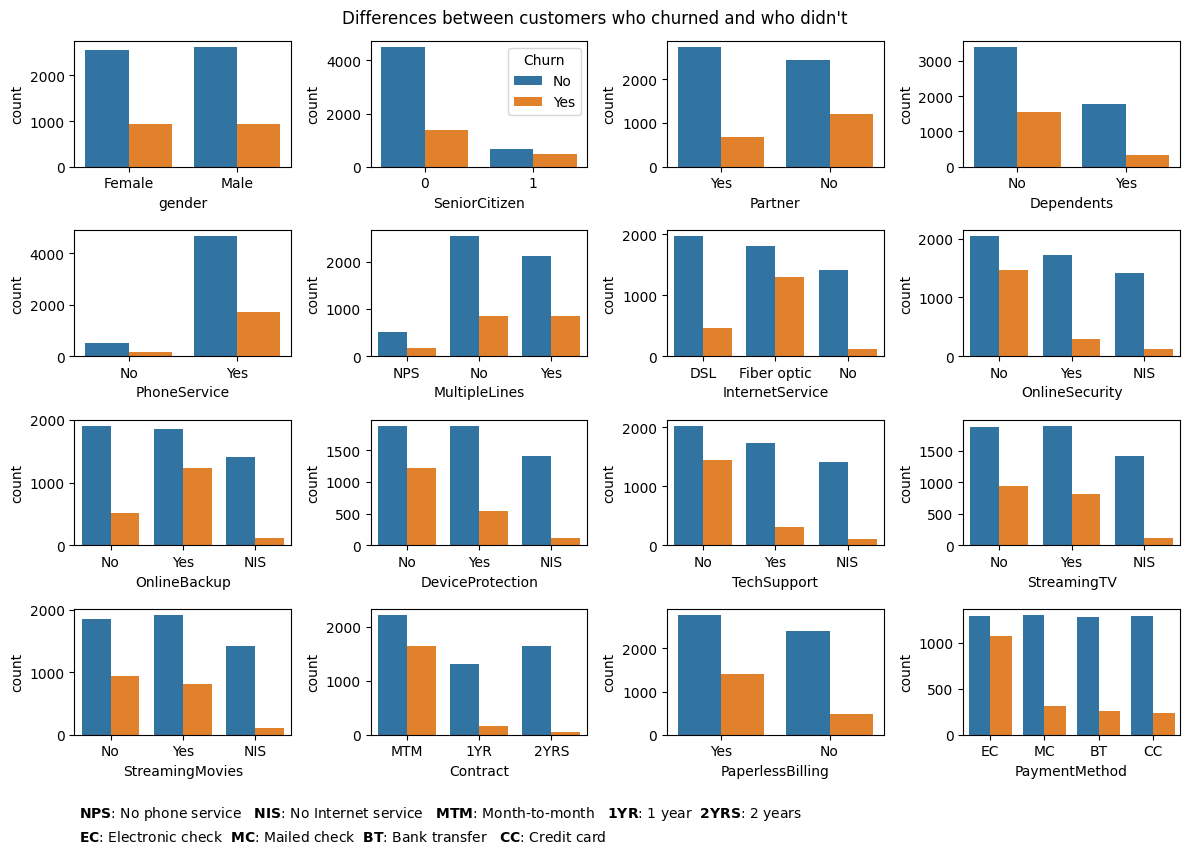

In [5]:
fig, ax = plt.subplots(figsize=(12,8), ncols=4, nrows=4)
fig.suptitle("Differences between customers who churned and who didn't")
sns.countplot(x='gender', data=df, hue="Churn", ax=ax[0,0])

sns.countplot(x='SeniorCitizen', data=df, hue="Churn", ax=ax[0,1])
sns.countplot(x='Partner', data=df, hue="Churn", ax=ax[0,2])
sns.countplot(x='Dependents', data=df, hue="Churn", ax=ax[0,3])
sns.countplot(x='PhoneService', data=df, hue="Churn", ax=ax[1,0])
sns.countplot(x='MultipleLines', data=df, hue="Churn", ax=ax[1,1])
ax[1,1].set_xticks([0,1,2], ['NPS','No','Yes'])
sns.countplot(x='InternetService', data=df, hue="Churn", ax=ax[1,2])
sns.countplot(x='OnlineSecurity', data=df, hue="Churn", ax=ax[1,3])
ax[1,3].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='OnlineBackup', data=df, hue="Churn", ax=ax[2,0])
ax[2,0].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='DeviceProtection', data=df, hue="Churn", ax=ax[2,1])
ax[2,1].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='TechSupport', data=df, hue="Churn", ax=ax[2,2])
ax[2,2].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='StreamingTV', data=df, hue="Churn", ax=ax[2,3])
ax[2,3].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='StreamingMovies', data=df, hue="Churn", ax=ax[3,0])
ax[3,0].set_xticks([0,1,2], ['No','Yes','NIS'])
sns.countplot(x='Contract', data=df, hue="Churn", ax=ax[3,1])
ax[3,1].set_xticks([0,1,2], ['MTM','1YR','2YRS'])
sns.countplot(x='PaperlessBilling', data=df, hue="Churn", ax=ax[3,2])
sns.countplot(x='PaymentMethod', data=df, hue="Churn", ax=ax[3,3])
ax[3,3].set_xticks([0,1,2,3], ['EC','MC','BT','CC'])
for i in range(4):
  for j in range(4):
    if(i ==0 and j==1 ): continue
    ax[i,j].get_legend().set_visible(False)
#sns.move_legend(ax[3,1],'lower left',ncol=2, bbox_to_anchor=(0.75, -0.2),frameon=False)
plt.figtext(0.07,-0.03,"$\\bf{NPS}$: No phone service   $\\bf{NIS}$: No Internet service   $\\bf{MTM}$: Month-to-month   $\\bf{1YR}$: 1 year  $\\bf{2YRS}$: 2 years")
plt.figtext(0.07, -0.06,"$\\bf{EC}$: Electronic check  $\\bf{MC}$: Mailed check  $\\bf{BT}$: Bank transfer   $\\bf{CC}$: Credit card")
plt.tight_layout()
plt.show()

The customer profile which is more likely to churn has the following characteristics
* elder clients;
* has Internet service by optical fiber;
* has backup service, but not technical support nor device protection
* has a month-to-month contract;
* does payment by electronical check.

On the other side, the ones who are less likely to churn have the following profile:
* has partner and dependents
* doesn't have Internet service;
* has a two-year contract
* receives billing on paper
* pays with credit card


## 4. Preparing the data


### 4.1. Transforming categorical columns onto numerical ones
First, we will have to perform a series of transformations on the data in order to achieve better performance from the machine learning models to be tested. The procedures to be carried out are as follows:
* [Standardize](https://builtin.com/data-science/when-and-why-standardize-your-data) data on nuumerical columns;
* Categorical columns with only 2 possible values (Yes/No), with exception of target variable `Churn` will undergo a encoding called [OrdinalEncoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c);
* For all categorical variables with more than 2 possible values, we will use  [OneHotEncoder](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/);
* All columns, whose possible values are 0 and 1, will be kept as they are, with no pre-processing;
* Target value `Churn` will be encoded using [LabelEncoder][LabelEncoder](https://scikit-learn.org/stable/modules/preprocessing_targets.html#label-encoding), which works similarly to the `OrdinalEncoder`, except by the fact that it works with only column at a time, as it is suitable for target columns.

In order to execute procedures above, excpt the last one, which will be executed separetedly, the method `make_column_transformer` that allows group several commands into one statement.

In [4]:
#1st step: remove column customer_id
df.drop("customerID",axis=1,inplace=True)

#2nd step: convert column 'Churn' to numerical with 0 e 1 as possible values
#LabelEncoder cannot be executed by usingh make_column_transfer method
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])

#3rd step:  do all the procedures described above
transform = make_column_transformer(
    (StandardScaler(), ["tenure","MonthlyCharges","TotalCharges"]), #StandardScaler on numerical columns
    (OneHotEncoder(), ['gender','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                       'Contract','PaymentMethod','OnlineBackup']), #Using OneHotEncoder for categorical columns with more than 2 possible values
    (OrdinalEncoder(),['Dependents','Partner','PhoneService','PaperlessBilling']) , #OrdinalEncoder encoding for columns with only 2 possible values.
    remainder="passthrough"
)
transformed = transform.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transform.get_feature_names_out())

transformed_df.head()

,standardscaler__tenure,standardscaler__MonthlyCharges,standardscaler__TotalCharges,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,onehotencoder__PaymentMethod_Mailed check,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,ordinalencoder__Dependents,ordinalencoder__Partner,ordinalencoder__PhoneService,ordinalencoder__PaperlessBilling,remainder__SeniorCitizen,remainder__Churn
0,-1.277445,-1.160323,-0.992611,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.066327,-0.259629,-0.172165,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.236724,-0.362660,-0.958066,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.514251,-0.746535,-0.193672,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.236724,0.197365,-0.938874,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


Checking data types of the transformed columns:

In [ ]:
transformed_df.dtypes

standardscaler__tenure                                    float64
standardscaler__MonthlyCharges                            float64
standardscaler__TotalCharges                              float64
onehotencoder__gender_Female                              float64
onehotencoder__gender_Male                                float64
onehotencoder__MultipleLines_No                           float64
onehotencoder__MultipleLines_No phone service             float64
onehotencoder__MultipleLines_Yes                          float64
onehotencoder__InternetService_DSL                        float64
onehotencoder__InternetService_Fiber optic                float64
onehotencoder__InternetService_No                         float64
onehotencoder__OnlineSecurity_No                          float64
onehotencoder__OnlineSecurity_No internet service         float64
onehotencoder__OnlineSecurity_Yes                         float64
onehotencoder__DeviceProtection_No                        float64
onehotenco

### 4.2 Creating training and validation sets
We will split the data into a training and validation sets by allocating 15% of the records for the final validation.
We'll use cross validation.



In [5]:
# creating test set
test = transformed_df.sample(frac=0.15, random_state=0)

# deleting test records
df_train = transformed_df.drop(test.index)


# Checking training and test sets
print("Dimensions of test set: ", test.shape)
print("Dimensions of training sets: ", df_train.shape)


Dimensions of test set:  (1056, 42)
Dimensions of training sets:  (5987, 42)


In [6]:
# 3. Splitting data  into  feature matrix e target vector
X = df_train.drop('remainder__Churn', axis=1)
y = df_train['remainder__Churn']

#defining performance measures to be used
scoring = {"AUC": "roc_auc", "Accuracy": "accuracy","Precision":"precision","Recall":"recall"}


### 4.3. Performing data balancing
As the majority of customers didn't churn, data are imbalanced, and in order to achieve a equal proportion of both classes, we have to or downsize the majority class (undersampling) or upsize the minority one (oversampling). We have chosen a oversampling method called SMOTE, which creates fictitious data of minority class  similar to the actual data, through K-Nearest neighbours technique.

In [7]:
# Instantiating  SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

X_smt, y_smt = smote.fit_resample(X, y)


### 4.4 Preparing running of machine learning models
Before running the ML methods we´ll define some helper functions to be called during execution of the models.

In [8]:
best_results={}
def get_results(clf):
	lines = []
	for i in range(len(clf.cv_results_['params'])):
		measures={}

		for scorer in scoring:
			measures["%s_mean" % (scorer)] = clf.cv_results_["mean_test_%s" % scorer][i]
			measures["%s_confidence_interval" % (scorer)] =   "%0.4f (+/-%0.04f)" % (
					clf.cv_results_["mean_test_%s" % scorer][i],
					2*clf.cv_results_["std_test_%s" % scorer][i])
			#measures[scorer]= "%0.4f (+/-%0.04f)" % (clf.cv_results_["mean_test_%s" % scorer][i],
			# clf.cv_results_["std_test_%s" % scorer][i] )

		#print("%r for %r" % (measures,clf.cv_results_['params'][i]) )
		lines.append( {**measures, **clf.cv_results_['params'][i]} )

	dfResult = pd.DataFrame(lines)
	return (clf.best_score_,clf.best_params_,dfResult)
	#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
	#        print("%0.4f (+/-%0.04f) for %r"
	#              % (mean, std * 2, params))

def show_results(best_score,best_params,dataframe):
	print("Best: {} using {}".format(best_score,best_params))
	print("Number of performed tests: %d" % (dataframe.shape[0]))

show_best_result = lambda df: df.sort_values(by='Recall_mean', ascending=False).head(1)


## 5. Applying machinne learning methods
Now we can check performance of several machine learning models. We will use cross validation and for each model tests with several combinations of hyperparameters will be performed for finding the ones with the best performance.
Cross validation splits training data into blocks with same size, and picks one of them to be the test block. Next, another block is selected and this process repeats until all blocks are used for testing. When this happens, a summary of the executions is displayed.   
We will use the most common machine learning models, split into two major groups: ordinary and ensemble methods. Here are the methods that will be tested:
*Ordinary methods:
 * Logistic regression
 * Support Vector Machines (SVM)
 * Decision tree
 * Naive Bayes
 * Stochastic gradient descend

* Ensemble methods:
 * XGBoost
 * Random forest
 * AdaBoost
 * Voting Classifier

For each model above we'll extract the most important measures: accuracy, precision, recall and AUC. As, by default, cross validation methods displays only accuracy, it will be necessary to change `scoring` parameter.

For all models, except XGBoost, we will apply [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class, for hyperparameter tunning. GridSeachCV tests all combinations of hyperparametrs, also applying cross validation. The best combination is the one which has the best recall, because it measures the ability of identifying churns correctly.   
For XGboost, [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html), will be used instead of GridSearch, because the later takes a long time to rum. RandomizedSearchCV tests only a few combinations of hyperparameters picked randomly.
For Voting Classifier, which doesn't have hyperparameters, cross validation will be applied directly.


### 5.1. Ordinary methods


#### 5.1.1 Logistic Regression
For [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) tests will be made upon `C` and `solver` parameters:

In [11]:

# 2. Instantiate and chose hyperparameters
model = LogisticRegression(max_iter=300)
parameters = {
    'C': [0.1,1,10,100,1000],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
    } # 'sag',

clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)

GridSearchCV(estimator=LogisticRegression(max_iter=300),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky']},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [12]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Best: 0.8133628028303214 using {'C': 100, 'solver': 'lbfgs'}
Number of performed tests: 20


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,C
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.856230,0.774977,0.756007,0.812176,222.220000
std,0.000191,0.000810,0.000235,0.002030,400.839216
min,0.855836,0.773328,0.755575,0.808116,0.100000
25%,0.856306,0.775154,0.755905,0.812906,1.000000
50%,0.856310,0.775382,0.756022,0.813134,10.000000
75%,0.856334,0.775496,0.756182,0.813192,100.000000
max,0.856347,0.775496,0.756299,0.813363,1000.000000


In [13]:
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,C,solver
12,0.856309,0.8563 (+/-0.0178),0.775496,0.7755 (+/-0.0192),0.756182,0.7562 (+/-0.0188),0.813363,0.8134 (+/-0.0344),100.0,lbfgs


As can be seen above, there was little variation in the performance measures for the different combinations of logistic regression parameters. The accuracy was around 77.5%. The accuracy between 75.6% and 75.9%. The area under the curve was around 0.856 and the recall between 80.8% and 81.3%.

**Best result (recall): 81.3%**

#### 5.1.2 Suppor Vector Machines (SVM)




In [14]:
model = SVC()
kernel = ['poly', 'rbf']
C = [100, 50, 10, 1.0]
# define grid search
parameters = dict(kernel=kernel,C=C)
clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100, 50, 10, 1.0], 'kernel': ['poly', 'rbf']},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [15]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Best: 0.8802174286562222 using {'C': 50, 'kernel': 'rbf'}
Number of performed tests: 8


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,C
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.897344,0.816798,0.788057,0.866156,40.250000
std,0.014534,0.014522,0.013595,0.016829,41.818485
min,0.875153,0.792495,0.762391,0.832076,1.000000
25%,0.888285,0.811922,0.783443,0.863502,7.750000
50%,0.894281,0.818282,0.786611,0.872117,30.000000
75%,0.911663,0.829490,0.801259,0.877251,62.500000
max,0.914566,0.830831,0.801981,0.880217,100.000000


In [16]:
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,C,kernel
3,0.914566,0.9146 (+/-0.1031),0.830831,0.8308 (+/-0.0960),0.801223,0.8012 (+/-0.0115),0.880217,0.8802 (+/-0.2563),50.0,rbf


Even wih a few combinations of hyperparameters, execution of grid search upon SVM model was extremely slow, taking around 7 minutos for completing execution. AUC was
. AUC varied between 0.875 and 0.915. Accuracy was betwwen 79.2% e 83.1%. Precision between 76.2% and 80.1%. Recall was between 83.2% and 88%, however, with a very high standard deviation.

**Best result (recall):** 88,0%

#### 5.1.3 Decision Tree
Now let's test decision tree model


In [17]:
model=DecisionTreeClassifier()
parameters ={
    "max_depth":[2,3,4,5],
    "criterion":["gini", "entropy", "log_loss"]
}
clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5]},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [18]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Best: 0.8323063265699275 using {'criterion': 'entropy', 'max_depth': 5}
Number of performed tests: 12


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,max_depth
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.830489,0.764004,0.752107,0.788527,3.500000
std,0.021294,0.011763,0.006018,0.027479,1.167748
min,0.800245,0.755533,0.742358,0.760431,2.000000
25%,0.819277,0.755704,0.749852,0.773422,2.750000
50%,0.832919,0.758442,0.752988,0.780384,3.500000
75%,0.844243,0.769138,0.756590,0.799440,4.250000
max,0.855974,0.784511,0.760958,0.832306,5.000000


In [19]:
#Displaying line with the best result
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,criterion,max_depth
7,0.855974,0.8560 (+/-0.0438),0.782229,0.7822 (+/-0.0299),0.75659,0.7566 (+/-0.0173),0.832306,0.8323 (+/-0.0768),entropy,5


The best performance in terms of recall was 83.2%. AUC varied from 0.000 to 0.856. Accuracy was betwween 75.6% and 78.5%, precision between 74.2% and 76.1% and recall between 76% and 83.2%.
**Best performance: (recall):** : 83.2%
#### 5.1.4 Naive Bayes

In [20]:

model = GaussianNB()
parameters = {
    'var_smoothing': [1e-9,1e-5,0.001,0.01,0.1],
}

clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-05, 0.001, 0.01, 0.1]},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [21]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Best: 0.8683497081686739 using {'var_smoothing': 0.1}
Number of performed tests: 5


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,var_smoothing
count,5.000000,5.000000,5.000000,5.000000,5.000000e+00
mean,0.828728,0.748596,0.705472,0.853976,2.220200e-02
std,0.000447,0.004030,0.007219,0.008061,4.369312e-02
min,0.828473,0.741500,0.692697,0.849870,1.000000e-09
25%,0.828474,0.749143,0.706841,0.849870,1.000000e-05
50%,0.828482,0.750740,0.709256,0.850326,1.000000e-03
75%,0.828703,0.750740,0.709282,0.851467,1.000000e-02
max,0.829509,0.750855,0.709282,0.868350,1.000000e-01


In [22]:
#Displaying the best result

show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,var_smoothing
4,0.829509,0.8295 (+/-0.0155),0.7415,0.7415 (+/-0.0124),0.692697,0.6927 (+/-0.0124),0.86835,0.8683 (+/-0.0251),0.1


Performance measures had only a little variation here. Accuracy was between 74.2% e 75.1%.  AUC, virtually constant around  0.828. Precisão standing between 69.2% e 70.9% e and recall between 85% and 86.8%.

**Best performance: (recall):** : 86.8%
#### 5.1.5 Sthocastic gradient descent

In [9]:
model = SGDClassifier()

parameters={
    'loss': ['hinge', 'log_loss', 'perceptron'],
    'learning_rate':['optimal','constant','invscaling'],
    'alpha':[0.0001,0.001, 0.01],
    'eta0':[0.01,0.1,1.0]
}

clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.01, 0.1, 1.0],
                         'learning_rate': ['optimal', 'constant', 'invscaling'],
                         'loss': ['hinge', 'log_loss', 'perceptron']},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [10]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Best: 0.8838329089934032 using {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'perceptron'}
Number of performed tests: 81


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,alpha,eta0
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,0.824740,0.733201,0.731157,0.747446,0.003700,0.370000
std,0.032874,0.041780,0.034712,0.098188,0.004498,0.449775
min,0.736148,0.614867,0.592937,0.315644,0.000100,0.010000
25%,0.800547,0.701811,0.714769,0.698791,0.000100,0.010000
50%,0.846013,0.759870,0.744879,0.785988,0.001000,0.100000
75%,0.852979,0.766597,0.752572,0.808587,0.010000,1.000000
max,0.855829,0.773899,0.813812,0.883833,0.010000,1.000000


In [11]:
#Displaying the best result
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,alpha,eta0,learning_rate,loss
41,0.809601,0.8096 (+/-0.0564),0.708873,0.7089 (+/-0.0434),0.664094,0.6641 (+/-0.1036),0.883833,0.8838 (+/-0.2183),0.001,0.1,constant,perceptron


As this method had the greatest combination of parameters,  performance measures varied a lot. Best AUC was 0.856, best accuracy was 77.4%, best precision was 76%, and best recall was 88.3%.

**Best performance: (recall):** 88.3%

### 5.2. Ensemble methods
Ensemble methods combine multiples algorithms aiming to achieve a better performance than each of the algorithms indivually.


#### 5.2.1 XGBoost
XGBoost presents several hyperparameters, so executing GridSearchCV here takes a long time, it can last more than 1 hour. So, this is why we use RandomSearchCV instead. By default, this one runs with only 10 possible combination of hyperparamenters.

In [25]:


# 2. Instanitate an chose hyperparametes.
model = XGBClassifier()

parameters = {
    'n_estimators': [10,100,1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [2,3,7,9],
    'subsample': [0.5,0.7,0.8,0.9,1.0],
}
clf = RandomizedSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [2, 3, 7, 9],
                                        'n_estimators': [10, 100, 1000],
                                        'subsample': [0.5, 0.7, 0.8, 0.9, 1.0]},
                   refit='Recall',
                   scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                            'Precision': 'precision', 'Recall': 'recall'})

In [26]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Best: 0.8592222343710137 using {'subsample': 0.9, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.1}
Number of performed tests: 10


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,subsample,n_estimators,max_depth,learning_rate
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.896939,0.808790,0.794331,0.838780,0.860000,424.000000,4.700000,0.061300
std,0.030671,0.027915,0.046997,0.016116,0.157762,496.950702,2.945807,0.050029
min,0.856727,0.763290,0.725977,0.813588,0.500000,10.000000,2.000000,0.001000
25%,0.871169,0.785594,0.753403,0.828708,0.800000,10.000000,2.250000,0.003250
50%,0.888598,0.811322,0.793315,0.841542,0.850000,100.000000,3.000000,0.100000
75%,0.928447,0.832490,0.838603,0.850610,1.000000,1000.000000,7.000000,0.100000
max,0.936597,0.844753,0.851714,0.859222,1.000000,1000.000000,9.000000,0.100000


In [27]:
#Displaying the best result
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,subsample,n_estimators,max_depth,learning_rate
1,0.869184,0.8692 (+/-0.0357),0.780175,0.7802 (+/-0.0217),0.742021,0.7420 (+/-0.0128),0.859222,0.8592 (+/-0.0643),0.9,10,3,0.1


Here, each execution of this method produces different results due to the randomness of the chosen parameters.   
With XGBoost AUC varied from 0.856 e 0.936; accuracy, between 76.3% and 84.4%; precision, betwween 79.4% änd 85.1% and recall between 83.8% and 85.9%.

**Best performance: (recall):**  85,9%

#### 5.2.2 Random Forest

In [28]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
parameters = dict(n_estimators=n_estimators,max_features=max_features)

clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [29]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Best: 0.8690317760318228 using {'max_features': 'log2', 'n_estimators': 1000}
Number of performed tests: 6


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,n_estimators
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.928092,0.852032,0.853115,0.851047,370.000000
std,0.010756,0.010730,0.002819,0.023297,489.652938
min,0.912377,0.836081,0.848336,0.817928,10.000000
25%,0.920577,0.844865,0.852210,0.833898,32.500000
50%,0.934106,0.857412,0.853404,0.864127,100.000000
75%,0.935187,0.859181,0.855278,0.866467,775.000000
max,0.936350,0.860834,0.855834,0.869032,1000.000000


In [30]:
#Displaying the best result
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,max_features,n_estimators
5,0.93635,0.9363 (+/-0.0702),0.860834,0.8608 (+/-0.1108),0.855834,0.8558 (+/-0.0206),0.869032,0.8690 (+/-0.2767),log2,1000


`RandomForest` perfmormed very well in terms of AUC, which varied from 0.914 and 0.936. Accuracy stood between 83.8% and 86%. Precision varied just a little, standing around 85%, and recall was between 81.9% and 86.9%.

**Best performance: (recall):** 86.9%
#### 5.2.3 AdaBoost

In [33]:
parameters = {
    'n_estimators': [10,100,1000],
    'learning_rate': [0.001, 0.01, 0.1,1],
}
model=AdaBoostClassifier()
clf = GridSearchCV(model, parameters, scoring=scoring,refit="Recall")
clf.fit(X_smt, y_smt)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [10, 100, 1000]},
             refit='Recall',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [34]:
(best_result, best_params, result) = get_results(clf)
show_results(best_result,best_params,result)
best_results[model.__class__.__name__]=best_result
result.describe()


Best: 0.9064549132315959 using {'learning_rate': 0.001, 'n_estimators': 10}
Number of performed tests: 12


,AUC_mean,Accuracy_mean,Precision_mean,Recall_mean,learning_rate,n_estimators
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.842724,0.777286,0.744263,0.857874,0.277750,370.000000
std,0.070148,0.036314,0.056490,0.030385,0.437406,466.865758
min,0.738534,0.738535,0.678594,0.831388,0.001000,10.000000
25%,0.810948,0.748374,0.700654,0.833270,0.007750,10.000000
50%,0.853834,0.769679,0.737755,0.846787,0.055000,100.000000
75%,0.884979,0.799198,0.779096,0.870181,0.325000,1000.000000
max,0.932839,0.835626,0.837911,0.906455,1.000000,1000.000000


In [35]:
show_best_result(result)

,AUC_mean,AUC_confidence_interval,Accuracy_mean,Accuracy_confidence_interval,Precision_mean,Precision_confidence_interval,Recall_mean,Recall_confidence_interval,learning_rate,n_estimators
0,0.738534,0.7385 (+/-0.0063),0.738535,0.7385 (+/-0.0065),0.678594,0.6786 (+/-0.0065),0.906455,0.9065 (+/-0.0205),0.001,10


AdaBoost was the method which achieved the best performance among all the methods, however measures varied a lot. AUC stood between 0.738 and 0.933; accuracy between 73.8% and 83.5%; precision between 67.9% and 83.8% and recall between 83.1% and 90.6%.

**Best performance: (recall):** 90.6%
#### 5.2.4 Voting Classifier

In [36]:
#initalizind ML models
lr = LogisticRegression(max_iter=300,C= 1000, solver ='lbfgs')
nb = GaussianNB(var_smoothing = 0.1)
svm = SVC(C=10, kernel='poly')
vtc = VotingClassifier(estimators=[
         ('lr', lr), ('svm', svm), ('gnb', nb)], voting='hard')
#I cannot include auc here because it gives a runtime exception.
scoring = ["accuracy","precision","recall"]
scv = cross_validate(vtc, X_smt, y_smt, cv=5, scoring=scoring)


In [37]:
#Displaying scores
for scorer in scoring:
  measure = scv["test_%s" % (scorer)]
  print("%s: %0.4f (+/- %0.4f)" % (scorer, measure.mean(), measure.std() * 2))
best_results[vtc.__class__.__name__]=scv["test_recall"].mean()


accuracy: 0.7872 (+/- 0.0186)
precision: 0.7526 (+/- 0.0161)
recall: 0.8560 (+/- 0.0480)


Accuracy was 78.7%, precision 75.2% and recall 85.6%.
## 6. Comparision between models
Now we will show short comparision of all models used in this project.

In [14]:
#displaying recalls for ML methods
dfResult = pd.DataFrame(data=best_results.values(), index=best_results.keys(), columns=['Recall'])

#sortinh on descending order
dfResult.sort_values(by=['Recall'], ascending=False)

,Recall
AdaBoostClassifier,0.906455
SGDClassifier,0.883833
SVC,0.880217
RandomForestClassifier,0.869032
GaussianNB,0.868350
XGBClassifier,0.859222
VotingClassifier,0.856029
DecisionTreeClassifier,0.832306
LogisticRegression,0.813363


Amd plot a chart with the recall performance of all models

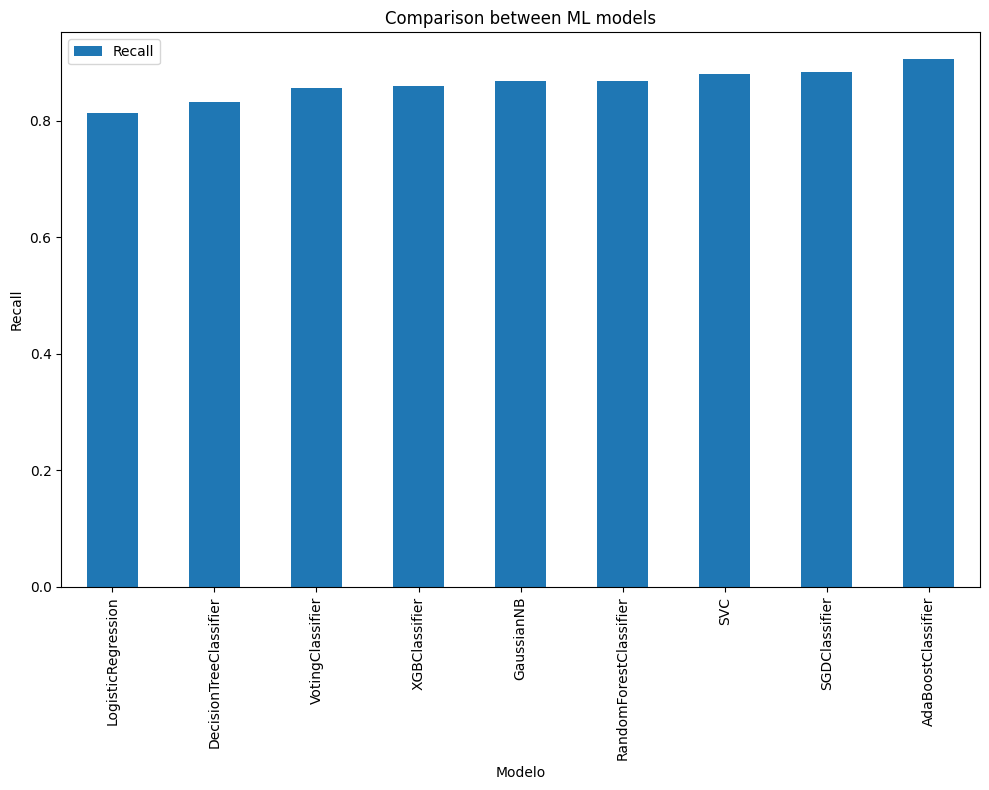

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
dfResult.sort_values(by=['Recall']).plot(kind="bar", y="Recall", ax=ax)
ax.set_title("Comparison between ML models")
ax.set_xlabel("Modelo")
ax.set_ylabel("Recall")

plt.tight_layout()


## 7. Applying the best model on the initial validation data
Remember that on the beginning of this project data set was splitted and 15% of the record was reserved for final validation. `AdaBoost` will be used here, for it was achieved the best performance.

In [40]:
# Creating ML model
model = AdaBoostClassifier(learning_rate=0.001, n_estimators= 10)

#training model
model.fit(X_smt, y_smt)

## Prepering test data
X = test.drop("remainder__Churn",axis=1)
y= test["remainder__Churn"]

y_pred = model.predict(X)

Classification report:
               precision    recall  f1-score   support

         0.0     0.9207    0.5727    0.7062       791
         1.0     0.4007    0.8528    0.5452       265

    accuracy                         0.6430      1056
   macro avg     0.6607    0.7128    0.6257      1056
weighted avg     0.7902    0.6430    0.6658      1056

Accuracy	Precision	Recall	F1-score	AUC
0.6430		0.4007		0.8528	0.5452		0.7128

Total amount of poositive records: 265
Total amount of negative records: 791



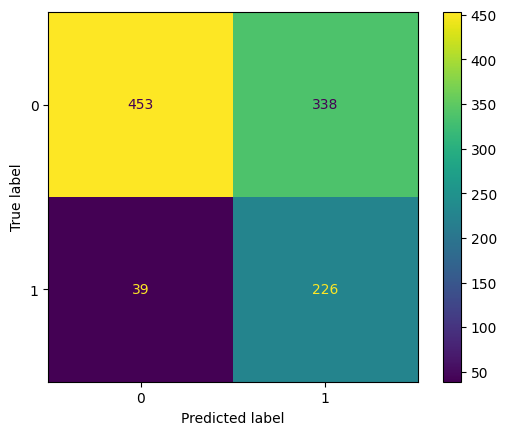

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# ploting confusion martrix
cm = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support

#printing classification report
print("Classification report:\n", classification_report(y, y_pred, digits=4))


precision,recall, f1, support = precision_recall_fscore_support(y, y_pred)
accuracy = accuracy_score(y, y_pred)
auc=roc_auc_score(y, y_pred)

#summary of the data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total amount of poositive records:", support[1])
print("Total amount of negative records: {:}\n".format(support[0]))


Performance metrics deteriorate noticeably when running the model with test data, which was never seen before. Still, AdaBoost was able to identify over 85% of cancellations.

## 8. Conclusions

Several tests were performed, with hyperparameter adjustments and in general there are no major differences between the tested methods. `AdaBoostClassifier` did best, followed closely by the Support Vector Machine and Gradient Descent model.
It is also noted that there is a drop in the performance of ML models in the validation process, when making predictions on previously unseen and unbalanced data, even so, the `AdaBoost` model did well with a hit rate of 85% . However, the precision drops significantly, indicating that the model incurs many false positives. More advanced *machine learning* techniques will be needed to improve accuracy.